# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

The question we want to answer today is: Do higher film budgets lead to more revenue in the box office? In other words, should a movie studio spend more on a film to make more? 



# Import Statements

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

 Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(f"There are {data.shape} rows and columns")

There are (5391, 6) rows and columns


In [5]:
print(f"We need to determine if there are any nan value in the dataset: {data.isnull().values.any()}")

We need to determine if there are any nan value in the dataset: False


In [6]:
print(f"We need to determine if there are any duplicated rows: {data.duplicated().any()}")

We need to determine if there are any duplicated rows: False


In [7]:
print(f"Our data consists of the following types:\n{data.dtypes}")

Our data consists of the following types:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


In [8]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [9]:
print("I need the columns as \n")
print("Int, Date, String, Float,Float,Float")
data.head()

I need the columns as 

Int, Date, String, Float,Float,Float


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [11]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget            object
USD_Worldwide_Gross              object
USD_Domestic_Gross               object
dtype: object

In [12]:
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace("$","") # First replace

C:\Users\ashis\AppData\Local\Temp\ipykernel_9440\2966341664.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace("$","") # First replace


In [13]:
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace(",","") # 2nd replace and just follow suit

In [14]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace("$", "")


C:\Users\ashis\AppData\Local\Temp\ipykernel_9440\343639850.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace("$", "")


In [15]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace(".", "")

C:\Users\ashis\AppData\Local\Temp\ipykernel_9440\2677578632.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace(".", "")


In [16]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace(",", "")

In [17]:
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace("$", "")
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace(",", "")


C:\Users\ashis\AppData\Local\Temp\ipykernel_9440\751368921.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace("$", "")


In [18]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [19]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget            object
USD_Worldwide_Gross              object
USD_Domestic_Gross               object
dtype: object

In [20]:
print("Now that we remove the signs and symbols we can convert datatypes")

Now that we remove the signs and symbols we can convert datatypes


In [21]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])

In [22]:
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])


In [23]:
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

In [24]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [25]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics



1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [26]:
print("Let us look at some statistics")
data.describe()

Let us look at some statistics


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [27]:
print("We can ignore the RANK")
print("We notice we have 5391 rows\n")

print("The average movie production budget is: $31,113,737.58")
print("The values deviate from the mean by around $40,523,796.88")
print("The lowest production budget is 1,100.00")
print("The max production budget for a movie was 425,000,000.00")
print("Assuming we are correct about our hypothesis, the min budget should produce the lowest gross movie")
print("Assuming we are correct about our hypothesis, the max budget should produce the highest gross movie\n")

print("The average USD worldwide gross of a movie is $88,855,421.96")
print("The deviation around the average is $168,457,757.00")
print("It would appear there is at least a single movie which grossed $0")
print("The highest grossing movie generated 2,783,918,982.00\n")

print("The average USD Domestic gross is $41,235,519.44")
print("With a deviation of $66,029,346.27")
print("The highest grossing domestic movie made 936,662,225.00")

We can ignore the RANK
We notice we have 5391 rows

The average movie production budget is: $31,113,737.58
The values deviate from the mean by around $40,523,796.88
The lowest production budget is 1,100.00
The max production budget for a movie was 425,000,000.00
Assuming we are correct about our hypothesis, the min budget should produce the lowest gross movie
Assuming we are correct about our hypothesis, the max budget should produce the highest gross movie

The average USD worldwide gross of a movie is $88,855,421.96
The deviation around the average is $168,457,757.00
It would appear there is at least a single movie which grossed $0
The highest grossing movie generated 2,783,918,982.00

The average USD Domestic gross is $41,235,519.44
With a deviation of $66,029,346.27
The highest grossing domestic movie made 936,662,225.00


In [28]:
print("Let us determine the skew of the data")

Let us determine the skew of the data


In [29]:
data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].skew()

USD_Production_Budget   2.57
USD_Worldwide_Gross     4.55
USD_Domestic_Gross      3.63
dtype: float64

In [30]:
print("WE notice all 3 numerical columns are positively skewed")

WE notice all 3 numerical columns are positively skewed


In [31]:
print("This must mean the Average > Mode")

This must mean the Average > Mode


In [32]:
print(f"Is {data.USD_Production_Budget.mean()} > {data.USD_Production_Budget.mode()}\n{data.USD_Production_Budget.mean() > data.USD_Production_Budget.mode()}")

Is 31113737.57837136 > 0    20000000
Name: USD_Production_Budget, dtype: int64
0    True
Name: USD_Production_Budget, dtype: bool


In [33]:
print("Given the sparsity of the data values, it makes sense as we would expect movies to have varying costs and revenues")
print("This will almost always result in their been no true mode")

Given the sparsity of the data values, it makes sense as we would expect movies to have varying costs and revenues
This will almost always result in their been no true mode


# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [34]:
data[data.USD_Domestic_Gross == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [35]:
data[data.USD_Domestic_Gross == 0]['USD_Production_Budget'].max()

175000000

In [36]:
data[(data.USD_Domestic_Gross == 0) & (data.USD_Production_Budget == 175000000)]


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


In [37]:
print("What even is this movie?")

What even is this movie?


In [38]:
print('These entries must be errors')

These entries must be errors


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [39]:
data[data.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [40]:
data[data.USD_Worldwide_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [41]:
data[data.USD_Worldwide_Gross == 0].shape

(357, 6)

In [42]:
print("There are 357 movies that grossed 0 internationally")


There are 357 movies that grossed 0 internationally


### Filtering on Multiple Conditions

Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 



In [43]:
data[(data.USD_Worldwide_Gross > 0) & (data.USD_Domestic_Gross == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [44]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [45]:
data_clean = data[data.Release_Date > scrape_date]

In [46]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [47]:
(data[data.USD_Production_Budget > data.USD_Worldwide_Gross].shape[0] / (data.shape[0])) * 100

37.3585605639028

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time



<img src=https://i.imgur.com/8fUn9T6.png>



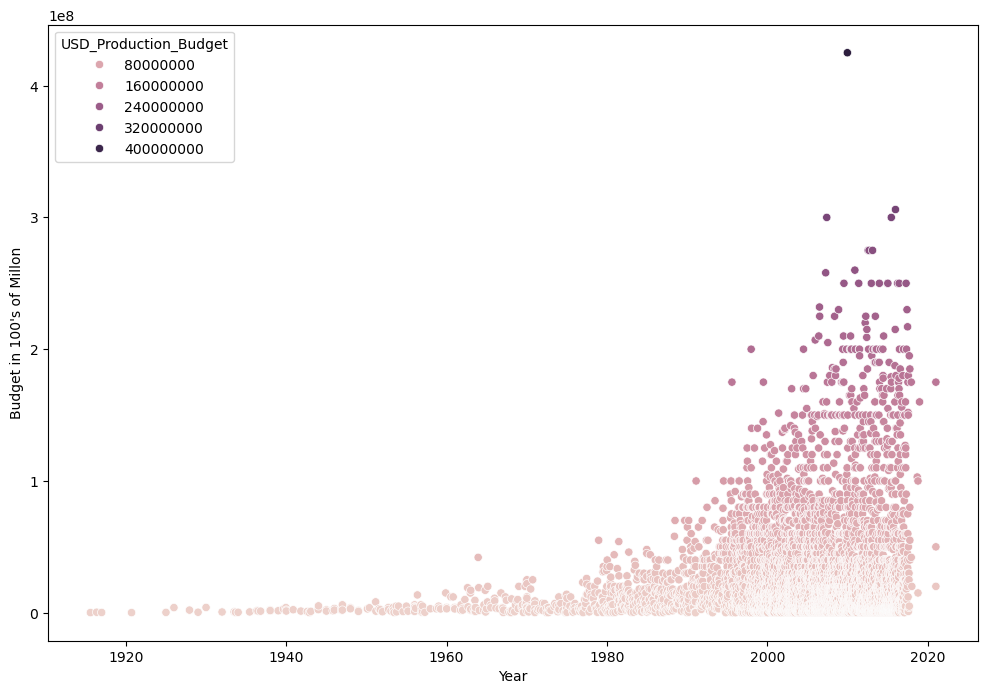

In [48]:
plt.figure(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Budget in 100's of Millon")

plot = sns.scatterplot(data=data,x=data.Release_Date, y=data.USD_Production_Budget, hue=data.USD_Production_Budget)




# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [49]:
dti = pd.DatetimeIndex(data.Release_Date)

In [50]:
dti.year

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2018, 2018, 2018, 2018, 2020, 2020, 2020],
           dtype='int64', name='Release_Date', length=5391)

In [51]:
decades = [(x//10)*10 for x in dti.year]

In [52]:
decades

[1910,
 1910,
 1910,
 1920,
 1920,
 1920,
 1920,
 1920,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,

In [53]:
data['Decade'] = decades

In [54]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0,2010
5387,126,2018-12-18,Aquaman,160000000,0,0,2010
5388,96,2020-12-31,Singularity,175000000,0,0,2020
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,2020


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [55]:
old_films = data[data.Decade < 1970]

In [56]:
old_films.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910


In [57]:
new_films = data[data.Decade >= 1970]

In [58]:
new_films.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970


# Seaborn Regression Plots

Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

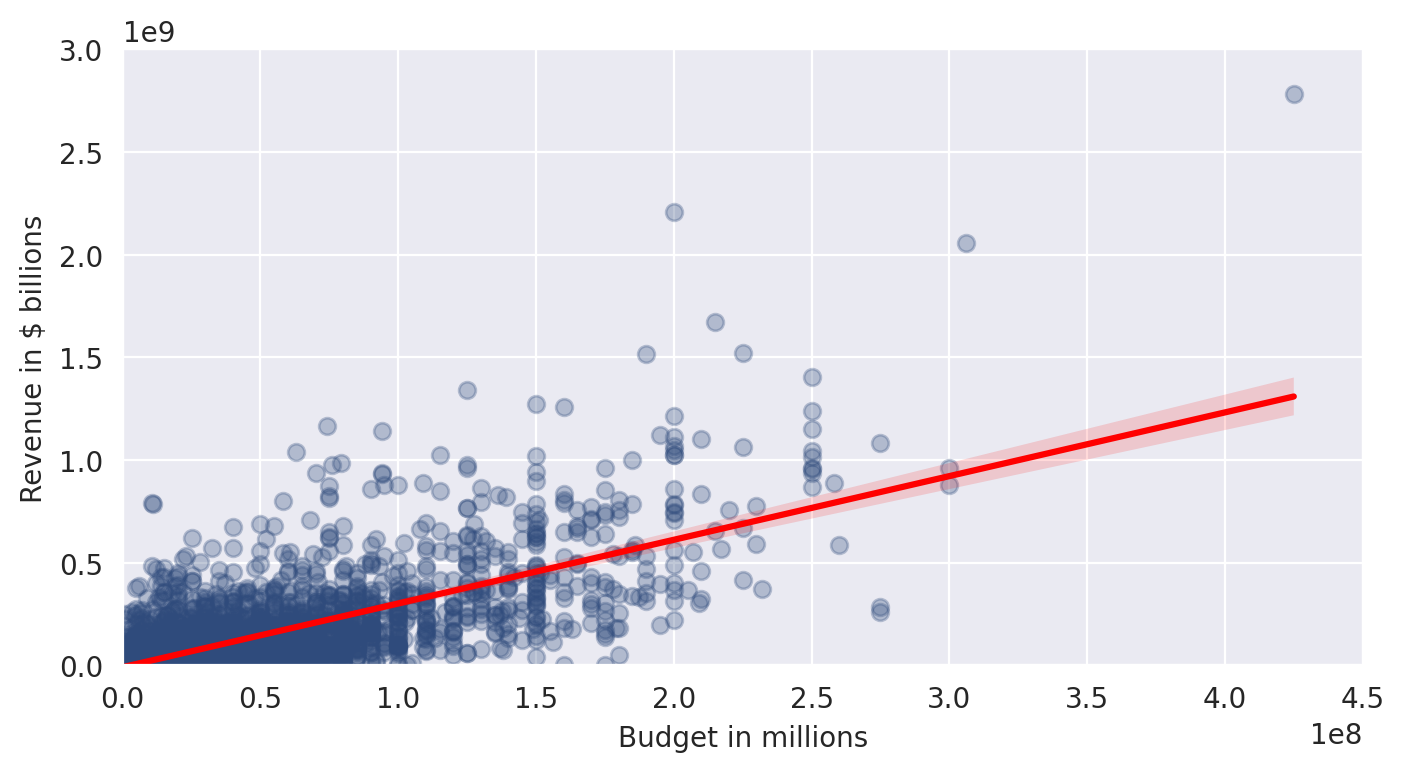

In [64]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    
    ax = sns.regplot(data=new_films, x=new_films.USD_Production_Budget, 
                y=new_films.USD_Worldwide_Gross,
               color="#2f4b7c",
                scatter_kws={'alpha':0.3},
                line_kws={'color': 'red'})
    
ax.set(ylim=(0,3000000000),
      xlim=(0,450000000),
      ylabel="Revenue in $ billions",
      xlabel="Budget in millions")
    
plt.show()

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [70]:
print("Now read it as a line:\n")
print("Estimated = y-axis + slope(x-axis)")


Now read it as a line:

Estimated = y-axis + slope(x-axis)


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [66]:
print("Let us remind ourselves\nhow much of the variation in revenue does the budget actually explain?")

Let us remind ourselves
how much of the variation in revenue does the budget actually explain?


In [67]:
print("What is Regression:\nPredicting a continuous-valued attribute associated with an object.")

What is Regression:
Predicting a continuous-valued attribute associated with an object.


In [72]:
revenue = old_films.USD_Worldwide_Gross

In [73]:
print("The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0.\nThe slope tells us how much extra revenue we get for a $1 increase in the movie budget.")

The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0.
The slope tells us how much extra revenue we get for a $1 increase in the movie budget.


In [75]:
regression = LinearRegression()

In [102]:
# Explantory variable(s) or feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response variable or target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [103]:
regression.fit(X,y)

LinearRegression()

In [104]:
# Theta zero: WHere the line intercepts the y-axis : How much a movie should make if budget is zero
regression.intercept_

array([-8338272.43659495])

In [105]:
# Slope: How much extra revenue we get for a $1 increase in movie budget
regression.coef_

array([[3.10151167]])

In [106]:
print("THe above are estimates")

THe above are estimates


In [107]:
print("One measure of figuring out how well our model fits our data is by looking at a metric called r-squared.\n This is a good number to look at in addition to eyeballing our charts.")



One measure of figuring out how well our model fits our data is by looking at a metric called r-squared.
 This is a good number to look at in addition to eyeballing our charts.


In [108]:
# R-squared
regression.score(X,y) * 100

55.29880674636849

In [85]:
print("WE see that our model explains about 56% of the variance in movie revenue")

WE see that our model explains about 56% of the variance in movie revenue


In [86]:
print("Now we need to check on the old_films data frame")

Now we need to check on the old_films data frame


In [87]:
old_films_regression = LinearRegression()

In [95]:
# Explantory variable(s) or feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response variable or target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [96]:
regression.fit(X,y)

LinearRegression()

In [97]:
regression.coef_

array([[1.64771314]])

In [98]:
regression.intercept_

array([22821538.63508038])

In [99]:
regression.score(X,y)* 100

2.937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [100]:
print("Well we know that for the new films that a $1 in budget results in a revenue of $3.10151167")

Well we know that for the new films that a $1 in budget results in a revenue of $3.10151167


In [101]:
print("Therefore given the budget we can estimate the revenue")

Therefore given the budget we can estimate the revenue


In [119]:
revenue = regression.intercept_[0]+ regression.coef_[0][0]*35000000

In [121]:
print(f"The expected revenue is around ${revenue}")

The expected revenue is around $100214635.86340149


In [122]:
print("Remember this is for new films")

Remember this is for new films
